STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs*




CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

0. Airplanes
1. Cars
2. Birds
3. Cats
4. Deer
5. Dogs
6. Frogs
7. Horses
8. Ships
9. Trucks

The dataset stands for the Canadian Institute For Advanced Research (CIFAR)

CIFAR-10 is widely used for machine learning and computer vision applications.

The dataset consists of 60,000 32x32 color images and 6,000 images of each class.

Images have low resolution (32x32).

Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


In [2]:
from keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

STEP #2: VISUALIZE DATA

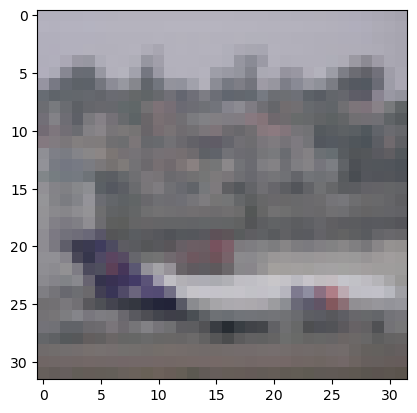

In [6]:
i=30000
plt.imshow(x_train[i])

C:\Users\lenovo\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


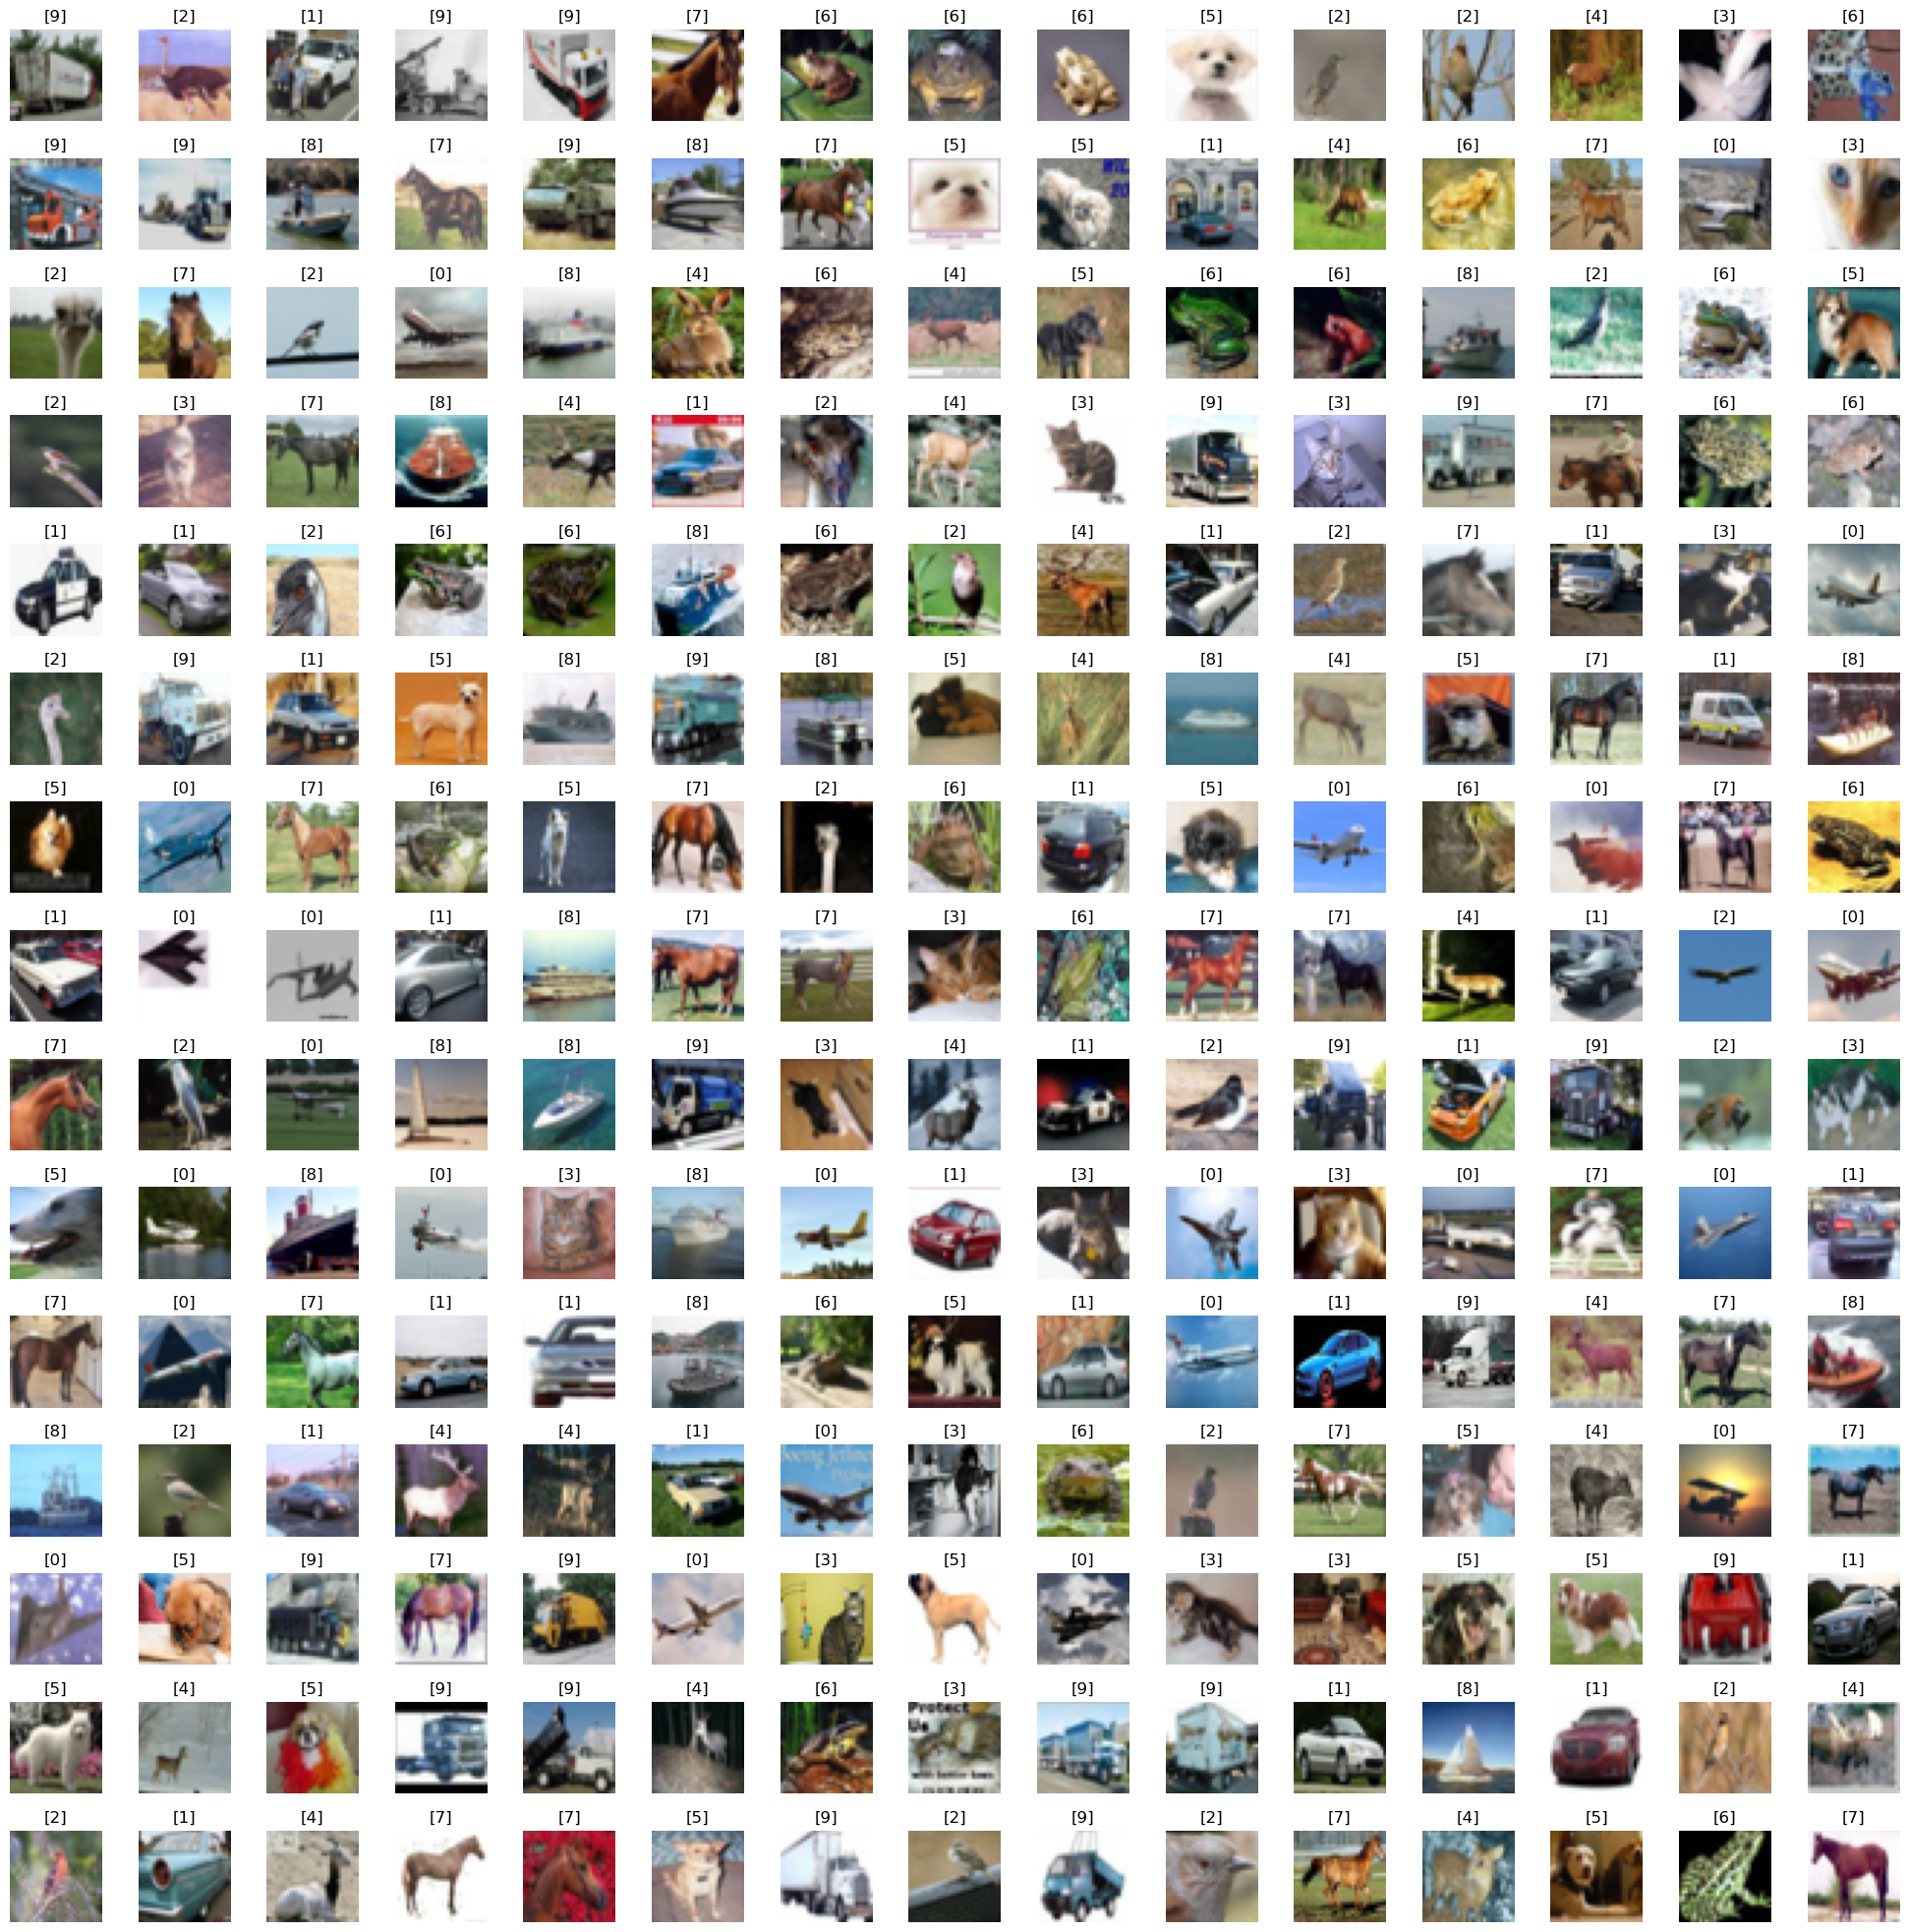

In [7]:
w_grid=15
l_grid=15

fig,axes=plt.subplots(l_grid,w_grid,figsize=(25,25))

axes=axes.ravel() #flatten the image into an array

n_training=len(x_train)
for i in np.arange(0,l_grid*w_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index]) #shows the class of the image over each image 
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)   

STEP #3: DATA PREPARATION

In [8]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

In [10]:
number_cat=10

In [11]:
y_train #Class

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import keras
y_train=keras.utils.to_categorical(y_train,10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [13]:
y_test=keras.utils.to_categorical(y_test,10)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [14]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [15]:
y_test.shape

(10000, 10)

In [16]:
x_train=x_train/255
x_test=x_test/255 #to make sure number are in bw 0 and 1

In [17]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
input_shape=x_train.shape[1:]

In [19]:
input_shape

(32, 32, 3)

STEP #4: TRAIN THE MODEL

In [20]:
from keras.models import Sequential 
model = Sequential()
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Conv2D- convolution , maxpooling-downsampling - reducing dim of image, avgpooling- another way to do downsampling
#dense - ANN , flatten - to flatten our array , Dropout - regularisation to reduce overfiting 
#adam is an optimizer 

In [21]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=input_shape,padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(2,2)) #downsampled to 2,2 matrix
model.add(Dropout(0.4)) 

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2)) #downsampled to 2,2 matrix
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units=1024,activation='relu')) #to make a fully connected network
#512 neurons in the layer
model.add(Dense(units=1024,activation='relu'))

model.add(Dense(units=10,activation='softmax')) #LAST LAYER HAS TO HAVE 10 NEURONs

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,277,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,597,834 (17.54 MB)

 Trainable params: 4,597,834 (17.54 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'])


In [24]:
x_test.size

30720000

In [25]:
x_train.size

153600000

In [26]:
history=model.fit(x_train,y_train,batch_size=32,epochs=2,shuffle=True)
#this will capture all the updations of the network
#shuffle will shuffle the images to make sure it learns on all CLASSES


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 181s 113ms/step - accuracy: 0.2960 - loss: 1.9010
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1175s 752ms/step - accuracy: 0.5730 - loss: 1.2299


STEP #5: EVALUATE THE MODEL

In [27]:
evaluation=model.evaluate(x_test,y_test)
print("Test Accuracy is-",evaluation)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.6145 - loss: 1.1781
Test Accuracy is- [1.1709294319152832, 0.6147000193595886]


In [28]:
y_test.shape

(10000, 10)

In [29]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [30]:
predicted_classes=model.predict(x_test)
predicted_classes
#predict_class method has been removed from tensorflow2.0 , so we hav to use
#predict() method and then convert them into categorical variables using argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


array([[3.23187606e-03, 2.82737776e-04, 2.35216692e-02, ...,
        2.52341083e-03, 1.44576635e-02, 5.86422801e-04],
       [1.26346182e-02, 1.78332310e-02, 1.86024845e-05, ...,
        3.53840086e-08, 9.69190121e-01, 3.13044322e-04],
       [9.81259793e-02, 3.13607156e-02, 1.58898979e-01, ...,
        3.82246524e-02, 1.60670921e-01, 8.19358155e-02],
       ...,
       [1.77580441e-05, 9.13785669e-08, 4.68008928e-02, ...,
        1.35279335e-02, 6.57494593e-06, 2.05639753e-06],
       [3.65521200e-02, 3.13514727e-03, 3.42852771e-01, ...,
        8.07682425e-03, 6.81522023e-03, 2.35987478e-03],
       [2.04537476e-09, 1.74186447e-12, 2.72015732e-05, ...,
        9.94218349e-01, 8.19779845e-13, 1.29928082e-10]], dtype=float32)

In [31]:
predicted_classes = np.argmax(predicted_classes, axis=1) 

predicted_classes

array([3, 8, 3, ..., 5, 2, 7], dtype=int64)

In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [33]:
y_test=y_test.argmax(1)

In [34]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

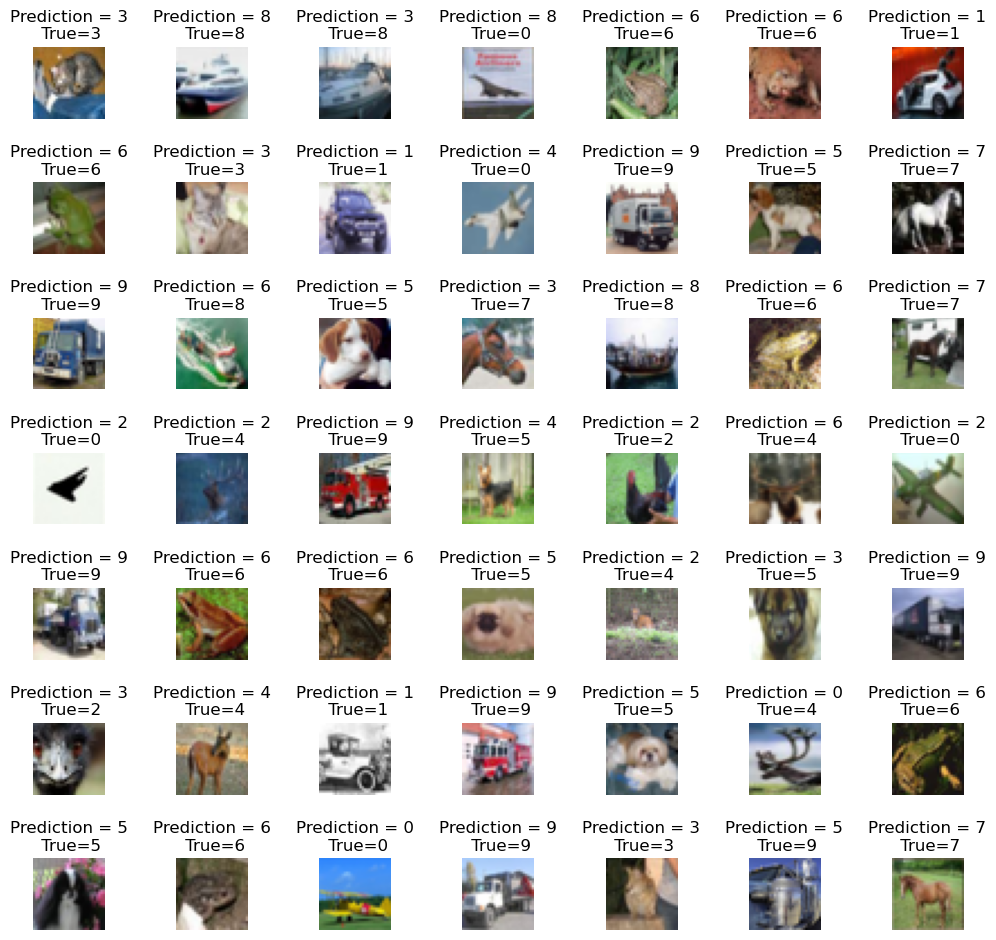

In [35]:
l=7
w=7
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Prediction = {}\n True={}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,predicted_classes)
cm

array([[566,   9, 190,  51,  40,   4,  31,   1,  98,  10],
       [ 24, 672,  76,  31,  10,   3, 108,   0,  36,  40],
       [ 23,   0, 633,  69,  80,  61, 127,   3,   3,   1],
       [  8,   1, 127, 553,  55, 124, 124,   4,   3,   1],
       [  7,   1, 123,  69, 549,  31, 199,  14,   7,   0],
       [  4,   1, 110, 291,  37, 472,  67,  16,   2,   0],
       [  0,   0,  50,  36,  15,   9, 887,   1,   2,   0],
       [  6,   0, 108, 103, 126, 103,  47, 503,   4,   0],
       [ 65,  14,  68,  59,  11,   4,  32,   2, 738,   7],
       [ 40,  78,  55,  88,   9,  10,  85,   7,  54, 574]], dtype=int64)

<Axes: >

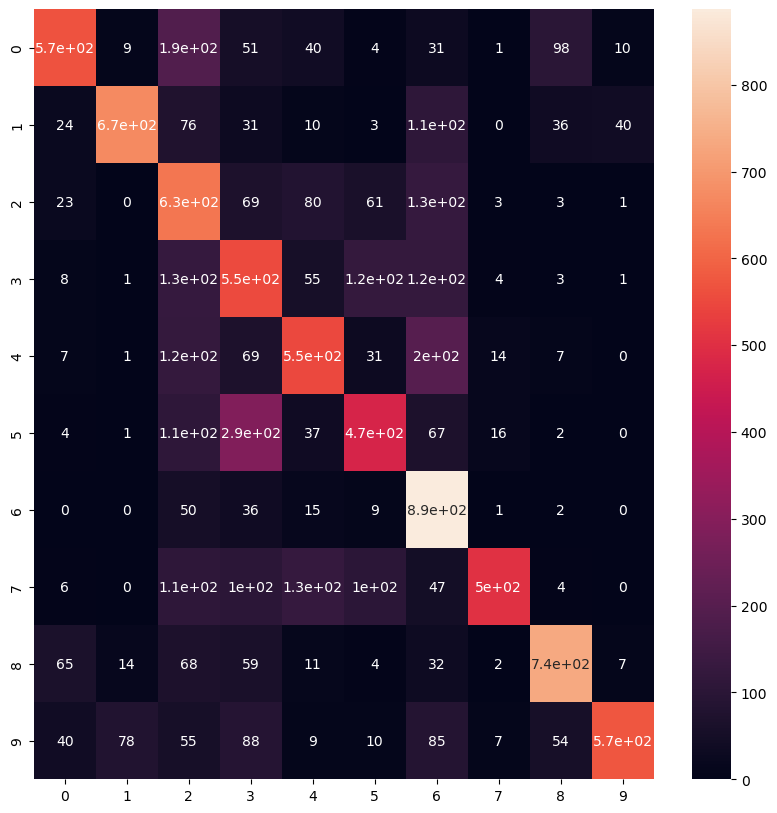

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

STEP #6: SAVING THE MODEL

In [53]:
import os
directory=os.path.join(os.getcwd(),'Saved_Models') #getcwd- gets current working directory and creates a folder called saved models in that 

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory,'keras_cfair10_trained_model.h5')

STEP 7 IMAGE/DATA AUGMENTATION

Making other kinds of versions of the training images like changing lighting,color scale,orientation etc , so that the model has more experience!


In [ ]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [ ]:
x_train.shape,x_test.shape

In [ ]:
n=8
x_train_sample = x_train[:n]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train=ImageDataGenerator(rotation_range=90,vertical_flip=True,brightness_range=(1,5))
#press shift+tab on ImageDataGenerator to see more variations!
datagen_train.fit(x_train_sample)

In [ ]:
#import scipy
#from scipy.misc import toimage , toimage has been removed from scipy!
#to convert matrix into image , just normalise it by dividing it by 255

fig=plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_sample,batch_size=n):
    #this will generate flow of 8 images 
    x_batch=x_batch/255
    for i in range(0,n):
        ax=fig.add_subplot(1,n,i+1); #1 row, n columns,i th column 
        ax.imshow((x_batch[i]))  
    fig.suptitle('Augmented Images rotated by 90 degrees')
    plt.show()
    break; #we only want one row

STEP 8 RETRAINING THE MODEL USING AUGMENTED DATASET

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=90,width_shift_range=0.1,horizontal_flip=True,vertical_flip=True)

In [41]:
datagen.fit(x_train)
model.fit(datagen.flow(x_train,y_train,batch_size=32),epochs=2)

Epoch 1/2


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 117ms/step - accuracy: 0.3875 - loss: 1.7190
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 180s 115ms/step - accuracy: 0.4554 - loss: 1.5387


In [42]:
prediction_class=model.predict(x_test)

prediction_class=prediction_class.argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


In [54]:
#saving the model

import os

directory1=os.path.join(os.getcwd(),'Saved_Models')

if not os.path.isdir(directory1):
    print(f"Directory does not exist. Creating directory at: {directory1}")
    os.makedirs(directory1)
else:
    print(f"Directory already exists at: {directory1}")
model_path=os.path.join(directory,'keras_cifar10_trained_model_Augmentation.h5')
print(f"Model will be saved to: {model_path}")

Directory already exists at: C:\Users\lenovo\Downloads\Saved_Models
Model will be saved to: C:\Users\lenovo\Downloads\Saved_Models\keras_cifar10_trained_model_Augmentation.h5
